CLASSIFICATION OF WHEAT SEEDS 

In this notebook I will perform classication of wheat seeds into 1)KAMA, 2)ROSA and 3)CANADIAN using KNN classification. 

About the dataset :

The dataset has been taken from UCI Machine Learning Repository (Eldem 2020, Yasar et al. 2016, Kayabasi et al. 2018).Margapuri et al. (2021). currently loaded from kaggle. 

The data set of wheat seeds containing 210 pieces of data with 7 features and labelled into 3 classes Canadian, Kama and Rosa. 

Importing the Libraries and Loading the Dataset:

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

seeds = pd.read_csv('seeds.csv')
seeds.describe()
#getting the mean, count of each feature


,ID,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,105.500000,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,60.765944,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,1.000000,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,53.250000,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,105.500000,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,157.750000,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,210.000000,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [4]:
seeds.head() #checking the columns 

,ID,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
0,1,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,2,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,3,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,4,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,5,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [5]:
seeds.info() #no missing values and checking the datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    210 non-null    int64  
 1   area                  210 non-null    float64
 2   perimeter             210 non-null    float64
 3   compactness           210 non-null    float64
 4   lengthOfKernel        210 non-null    float64
 5   widthOfKernel         210 non-null    float64
 6   asymmetryCoefficient  210 non-null    float64
 7   lengthOfKernelGroove  210 non-null    float64
 8   seedType              210 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 14.9 KB


Analysing using visualization tools 

/Users/harshikatiwari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


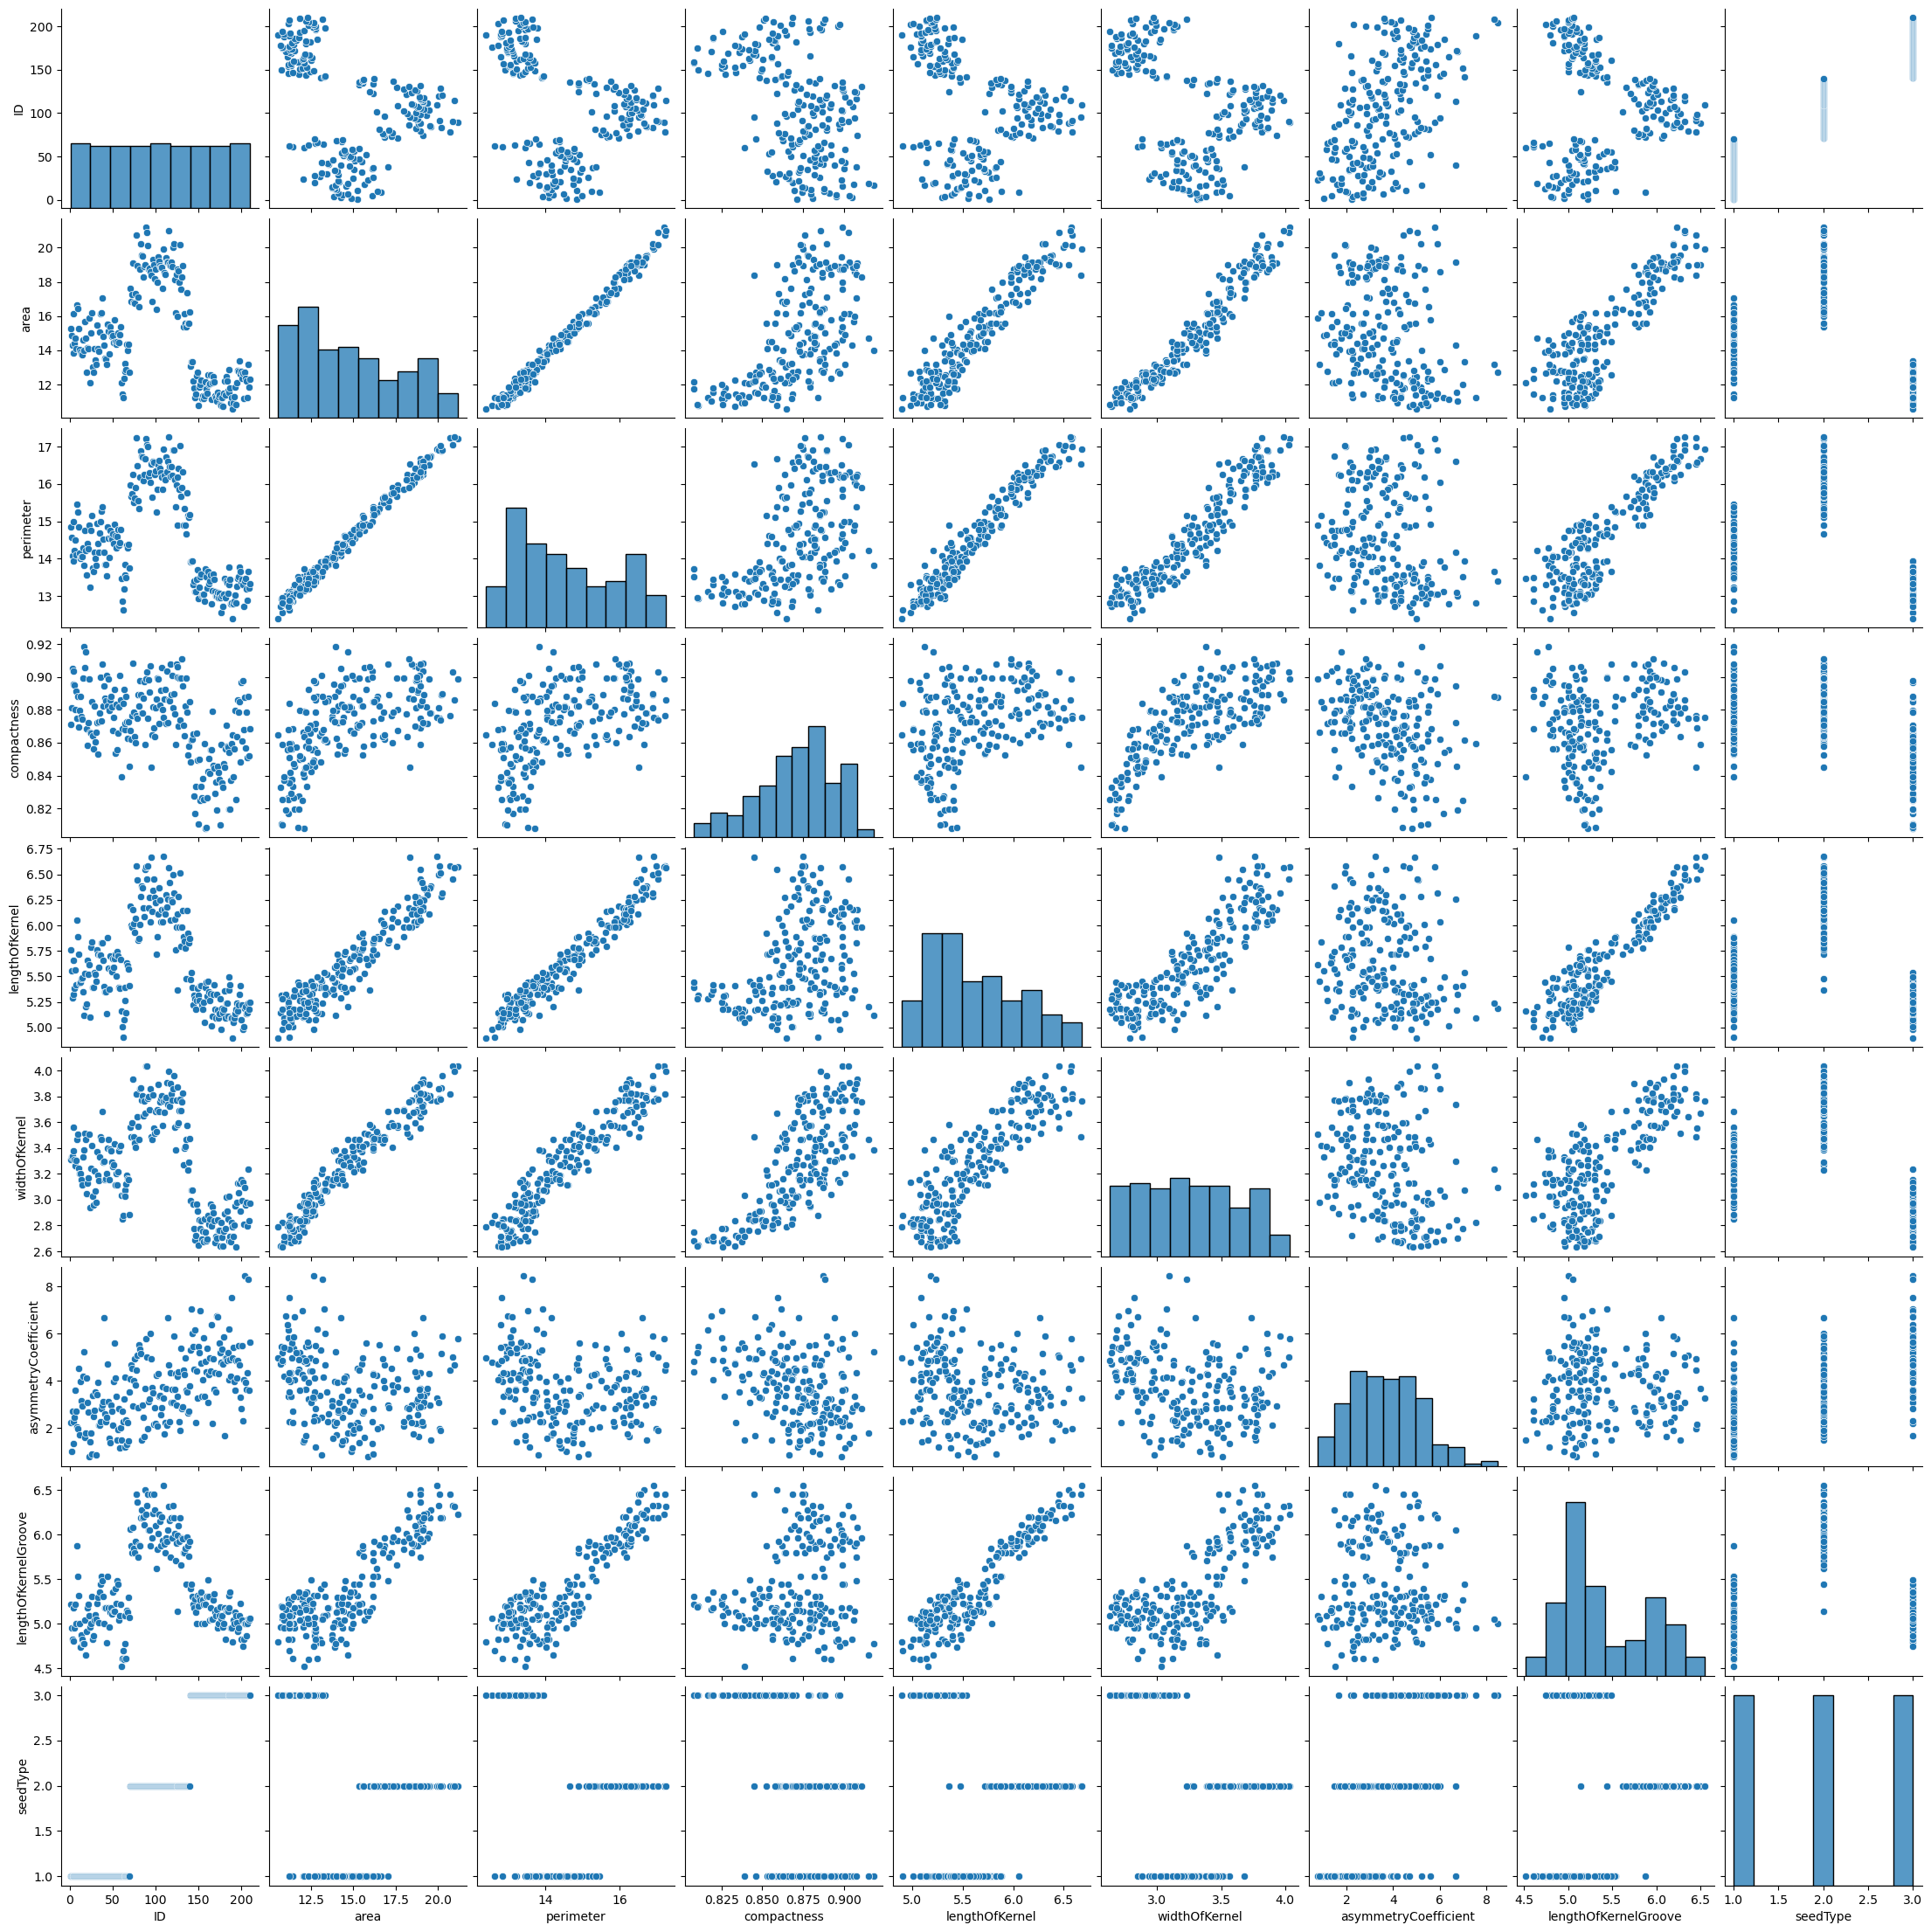

In [6]:
sns.pairplot(seeds)

/Users/harshikatiwari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


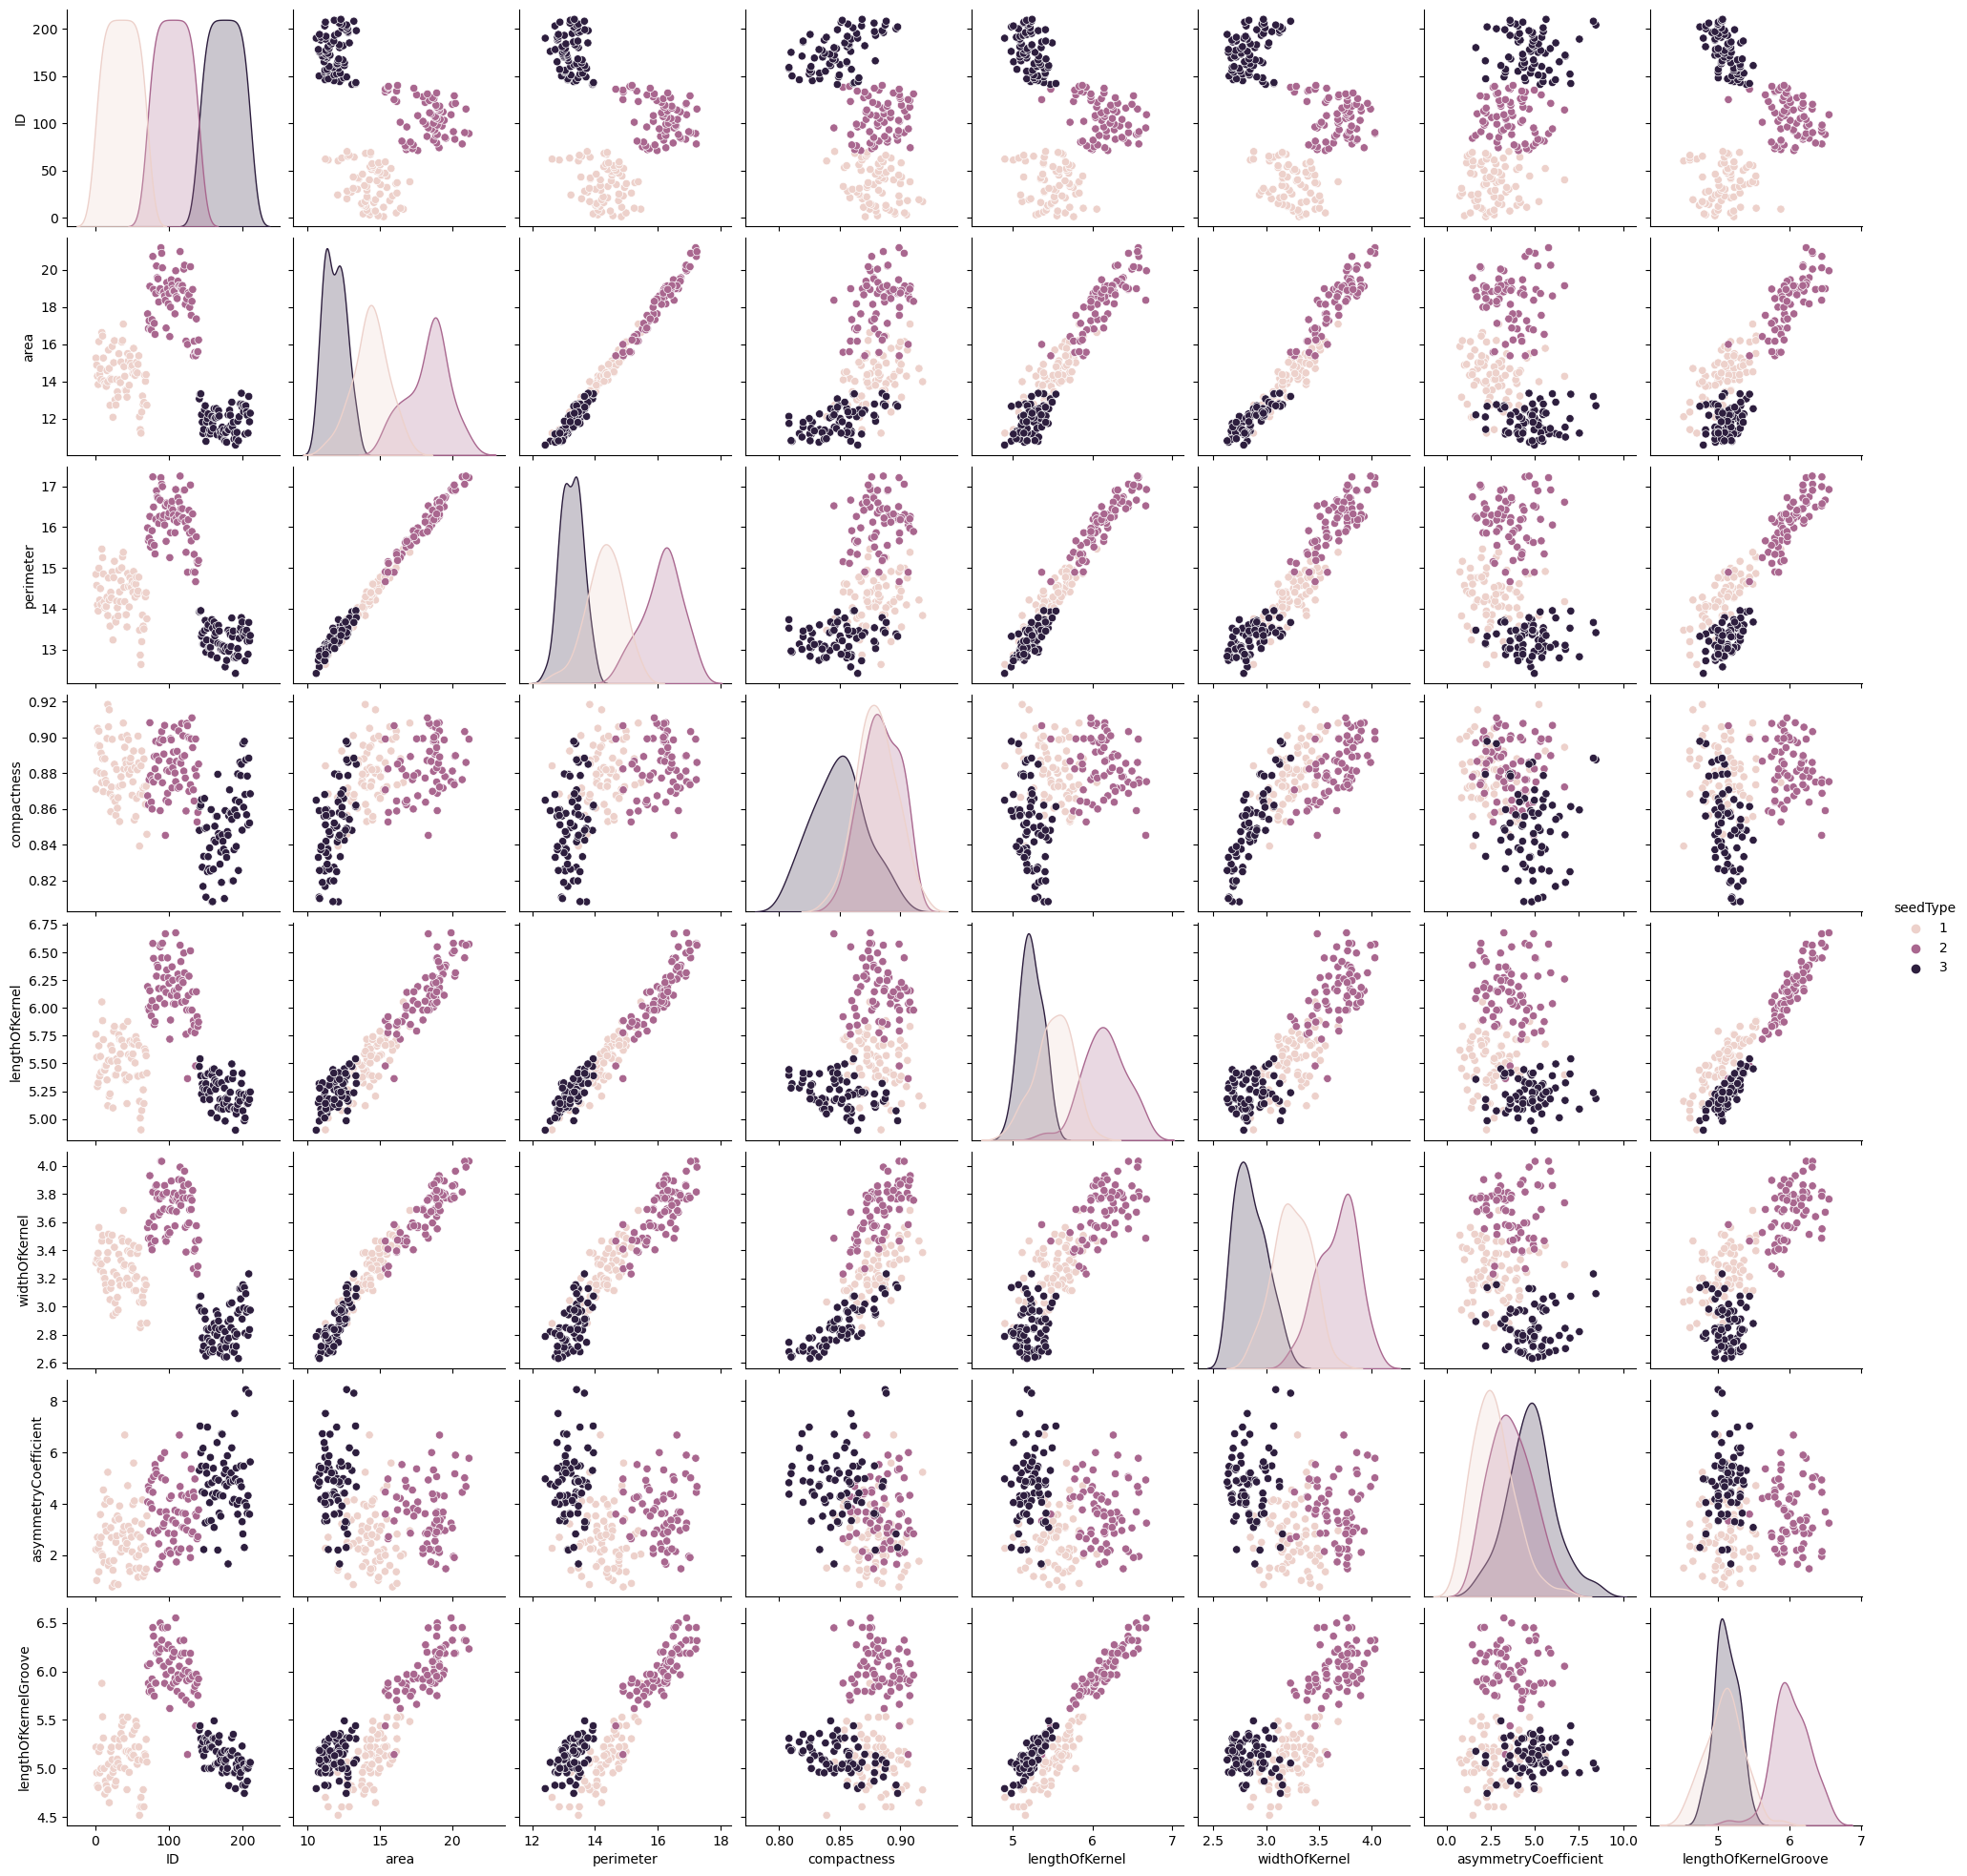

In [7]:
sns.pairplot(seeds, hue='seedType')

(8.0, 0.0)

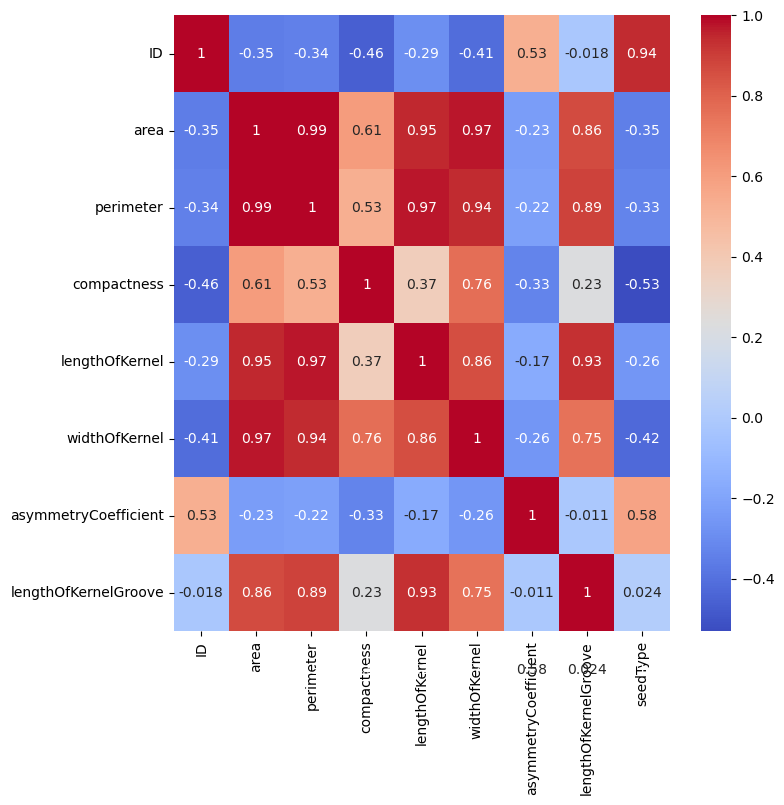

In [8]:
#Heat Map

plt.figure(figsize=(8,8))
cor = seeds.corr()
sns.heatmap(cor, annot = True,cmap = 'coolwarm')
plt.ylim(8,0)


Splitting dependent and independent variables: 

In [9]:
X = seeds.drop("ID", axis=1,inplace=True)


In [12]:
feature_cols = ["area","perimeter","compactness","lengthOfKernel","widthOfKernel", "asymmetryCoefficient","lengthOfKernelGroove"]
X = seeds[feature_cols]
Y = seeds['seedType']

seeds.area.astype(float)

0      15.26
1      14.88
2      14.29
3      13.84
4      16.14
       ...  
205    12.19
206    11.23
207    13.20
208    11.84
209    12.30
Name: area, Length: 210, dtype: float64

In [13]:
seeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   area                  210 non-null    float64
 1   perimeter             210 non-null    float64
 2   compactness           210 non-null    float64
 3   lengthOfKernel        210 non-null    float64
 4   widthOfKernel         210 non-null    float64
 5   asymmetryCoefficient  210 non-null    float64
 6   lengthOfKernelGroove  210 non-null    float64
 7   seedType              210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


Standardization of the data:

In [15]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
seeds_new = ss.fit_transform(seeds)

In [16]:
X = seeds.drop('seedType', axis=1)
Y = seeds['seedType']

Train-Test Split: 


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 3 , test_size = 0.3)

Training the Models:
    
LINEAR REGRESSION : Using the algorithm of linear regression we can predict the numerical values based on the input features. It believes a linear relationship between the features and the target variable. It remembers the best coefficients and uses it to predict the target variables for the given features

In [18]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, Y)

LinearRegression()

In [19]:
print(f'Coefficients : {lin_reg.coef_}')
print(f'Intercepts : {lin_reg.intercept_}')
print(f'R^2 score : {lin_reg.score(X,Y)}')

Coefficients : [  1.48907206  -3.22037506 -30.67743866  -2.31510066   0.24598421
   0.1148875    2.1925973 ]
Intercepts : 53.443559268195294
R^2 score : 0.751458521834222


In [24]:
LIN_REG = LinearRegression()
LIN_REG.fit(X_train, Y_train)

print(f'R^2 score for train data: {lin_reg.score(X_train,Y_train)}')
print(f'R^2 score for test data: {lin_reg.score(X_test,Y_test)}')

R^2 score for train data: 0.7621509391078433
R^2 score for test data: 0.7223172049558508


LINEAR REGRESSION OLS(ORDINARY LEAST SQUARE): ordinary least squares is a type of linear least squares method for choosing the unknown parameters in a linear regression model by the principle of least squares.

In [26]:
import statsmodels.api as sm #python library for statistics
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE #Recursive feature elimination (RFE) is a feature selection method that 
#fits a model and removes the weakest feature (or features) until the specified number of features is reached.

lin_reg2 = LinearRegression()
X_constant = sm.add_constant(X)
model = sm.OLS(Y, X_constant).fit()

predictions = model.predict(X_constant)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               seedType   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     87.25
Date:                Sun, 24 Dec 2023   Prob (F-statistic):           1.37e-57
Time:                        19:15:46   Log-Likelihood:                -109.23
No. Observations:                 210   AIC:                             234.5
Df Residuals:                     202   BIC:                             261.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   53.4436      7.445      7.178      0.000      38.763      68.124
area                     1.4891      0.261      5.698      0.000       0.974       2.004
perimeter               -3.2204      0.538     -5.984      0.000      -4.281      -2.159
compactness            -30.6774      5.241     -5.853      0.000     -41.012     -20.343
lengthOfKernel          -2.3151      0.454     -5.094      0.000      -3.211      -1.419
widthOfKernel            0.2460      0.786      0.313      0.755      -1.303       1.795
asymmetryCoefficient     0.1149      0.023      5.089      0.000       0.070       0.159
lengthOfKernelGroove     2.1926      0.204     10.770      0.000       1.791       2.594
==============================================================================
Omnibus:                        3.773   Durbin-Watson:                   1.087
Prob(Omnibus):                  0.152   Jarque-Bera (JB):                4.443
Skew:                           0.075   Prob(JB):                        0.108
Kurtosis:                       3.697   Cond. No.                     7.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

LOGISITIC REGRESSION : This type of statistical model (also known as logit model) is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1. In logistic regression, a logit transformation is applied on the odds—that is, the probability of success divided by the probability of failure. 

In [34]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(fit_intercept = True, solver='liblinear' , multi_class='ovr')
log_reg.fit(X_train,Y_train)

Y_test_pred = log_reg.predict(X_test)#to predict the lables of testing data
Y_test_prob = log_reg.predict_proba(X_test)# to predict the probability of each label for the testing data
Y_test_pred

array([3, 2, 2, 3, 2, 2, 3, 3, 1, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1, 3, 3, 3,
       1, 1, 1, 3, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 3, 3, 2, 2, 1,
       2, 3, 1, 2, 2, 3, 1, 1, 2, 1, 3, 2, 3, 2, 2, 1, 1, 2, 3])

In [39]:
predict = log_reg.predict(X_train)
predict


array([2, 2, 3, 1, 1, 3, 1, 2, 3, 1, 3, 2, 3, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 3, 2, 1, 3, 1, 3, 3, 3, 2, 1, 3, 3, 3, 2, 1, 1, 1, 1, 3,
       2, 1, 3, 3, 1, 1, 2, 3, 2, 2, 2, 1, 1, 2, 3, 3, 2, 3, 1, 3, 1, 1,
       3, 3, 1, 3, 3, 2, 1, 3, 1, 3, 1, 3, 1, 3, 2, 2, 3, 3, 2, 3, 2, 1,
       3, 2, 2, 1, 2, 3, 2, 1, 3, 1, 3, 1, 2, 3, 1, 2, 1, 2, 2, 2, 1, 3,
       1, 1, 3, 3, 3, 2, 2, 2, 3, 2, 1, 2, 1, 1, 1, 3, 2, 1, 3, 3, 2, 3,
       3, 3, 2, 3, 1, 3, 2, 3, 1, 1, 3, 3, 2, 3, 2])

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score,roc_auc_score, roc_curve , classification_report

print(classification_report(Y_train,predict))

              precision    recall  f1-score   support

           1       0.89      0.83      0.86        48
           2       0.92      0.94      0.93        47
           3       0.93      0.96      0.94        52

    accuracy                           0.91       147
   macro avg       0.91      0.91      0.91       147
weighted avg       0.91      0.91      0.91       147



In [46]:
print('The AUC score of the model :' , roc_auc_score(Y_test, Y_test_prob, multi_class = 'ovr'))

The AUC score of the model : 0.989449986689883


DECISION TREE CLASSIFIER : Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome. It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions. It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.
In order to build a tree, we use the CART algorithm, which stands for Classification and Regression Tree algorithm.

In [47]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [48]:
dt.fit(X,Y)

DecisionTreeClassifier()

In [50]:
dt_train = DecisionTreeClassifier()
dt_train.fit(X_train , Y_train)

DecisionTreeClassifier()

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score , classification_report
Y_test_pred = dt.predict(X_test)
Y_test_prob = dt.predict_proba(X_test)

In [55]:
print('Confusion-Matrix :','\n' ,confusion_matrix(Y_test,Y_test_pred))
print('Overall accuracy test:', accuracy_score(Y_test,Y_test_pred))
print('AUC SCORE: '  , roc_auc_score(Y_test,Y_test_prob, multi_class = 'ovr'))

Confusion-Matrix : 
 [[22  0  0]
 [ 0 23  0]
 [ 0  0 18]]
Overall accuracy test: 1.0
AUC SCORE:  1.0


RANDOM FOREST CLASSIFIER : It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

As the name suggests, "Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset." Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.



In [56]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100)
#n_estimators= The required number of trees in the Random Forest. 
#The default value is 10. We can choose any number but need to take care of the overfitting issue.
rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [57]:
Y_test_pred = rfc.predict(X_test)
Y_test_prob = rfc.predict_proba(X_test)
print('Confusion-Matrix :','\n' ,confusion_matrix(Y_test,Y_test_pred))
print('Overall accuracy test:', accuracy_score(Y_test,Y_test_pred))
print('AUC SCORE: '  , roc_auc_score(Y_test,Y_test_prob, multi_class = 'ovr'))

Confusion-Matrix : 
 [[21  0  1]
 [ 1 22  0]
 [ 2  0 16]]
Overall accuracy test: 0.9365079365079365
AUC SCORE:  0.9914315873871665


MULTINOMIAL NAIVE BAYES : Multinomial Naive Bayes algorithm is a probabilistic learning method that is mostly used in Natural Language Processing (NLP). The algorithm is based on the Bayes theorem and predicts the tag of a text such as a piece of email or newspaper article. It calculates the probability of each tag for a given sample and then gives the tag with the highest probability as output.



In [59]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()


In [60]:
mnb.fit(X_train,Y_train)

Y_test_pred = mnb.predict(X_test)
Y_test_prob = mnb.predict_proba(X_test)

In [61]:
print('Confusion matrix : ','\n' , confusion_matrix(Y_test,Y_test_pred))
print('Overall Acurracy score : ' , accuracy_score(Y_test,Y_test_pred))
print('AUC-test: ', roc_auc_score(Y_test,Y_test_prob, multi_class = 'ovr'))

Confusion matrix :  
 [[19  0  3]
 [ 3 19  1]
 [ 3  0 15]]
Overall Acurracy score :  0.8412698412698413
AUC-test:  0.8779669559980624


K-NN NEIGHBOUr: K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.
K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.
K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.
It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.
KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.


In [68]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

knn = KNeighborsClassifier()

In [76]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
205    3
206    3
207    3
208    3
209    3
Name: seedType, Length: 210, dtype: int64

In [97]:
X_train_standardize = X_train.apply(zscore)
X_test_standardize = X_test.apply(zscore)


In [98]:
knn.fit(X_train_standardize,Y_train)

KNeighborsClassifier()

In [99]:
Y_test_pred = knn.predict(X_test)
Y_test_prob = knn.predict_proba(X_test)



In [100]:
print('Confusion Matrix :' , '\n' , confusion_matrix(Y_test ,Y_test_pred))
print('Overall Accuracy Score : ' , accuracy_score(Y_test, Y_test_pred))
print('AUC-TEST: ' , roc_auc_score(Y_test, Y_test_prob, multi_class = 'ovr'))

Confusion Matrix : 
 [[ 0 22  0]
 [ 0 23  0]
 [ 0 18  0]]
Overall Accuracy Score :  0.36507936507936506
AUC-TEST:  0.5
